Epoch 1/5
938/938 [==============================] - 51s 54ms/step - loss: 0.1770 - accuracy: 0.9487 - val_loss: 0.0562 - val_accuracy: 0.9812
Epoch 2/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0533 - accuracy: 0.9839 - val_loss: 0.0501 - val_accuracy: 0.9844
Epoch 3/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0360 - val_accuracy: 0.9874
Epoch 4/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0304 - val_accuracy: 0.9907
Epoch 5/5
313/313 [==============================] - 3s 8ms/step


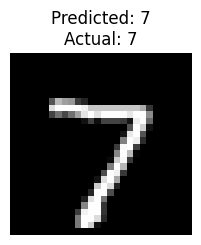

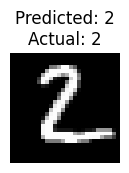

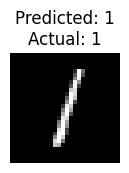

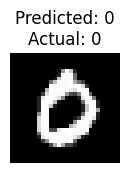

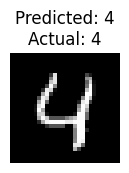

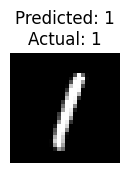

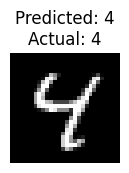

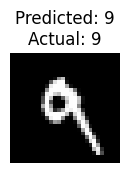

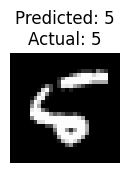

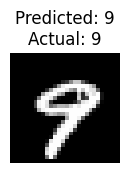

In [4]:
# @title Default title text
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
# Build the CNN model
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Flatten(),
Dense(64, activation='relu'),
Dense(10, activation='softmax')

])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
# Recognize characters and display recognized labels
predictions = model.predict(x_test)
recognized_labels = np.argmax(predictions, axis=1)
# Display images and recognized labels
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted: {recognized_labels[i]}\nActual: {np.argmax(y_test[i])}")
  plt.axis('off')
  plt.tight_layout()
  plt.show()